<a href="https://colab.research.google.com/github/guupiii/ESAA/blob/main/ESAA_YB_13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**05 DBSCAN**

**DBSCAN 개요**

간단하고 직관적인 알고리즘으로 돼있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능하다. 다음과 같이 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화한다고 가정할 때 앞에서 소개한 K평균, 평균이동, GMM으로는 효과적인 군집화를 수행하긱 아렵다. DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.

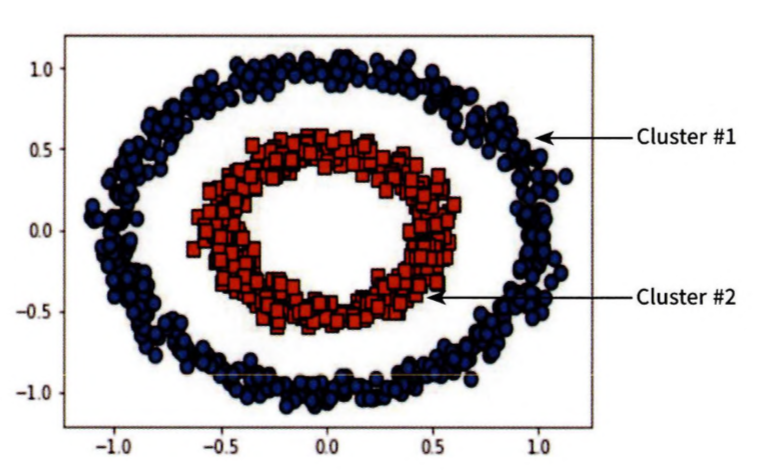

구성하는 가장 중요한 두 가지 파라미터는 입실론으로 표기하는 주변 영역과 이 입실롱 주변 영역에 포함되는 최소 데이터의 개수 min points이다.

- 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역

- 최소 데이터 개수(min points):개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

DBSCAN은 이처럼 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 구성하는 방식이다.

DBSCAN 적용하기 - 붓꽃 데이터 세트

In [2]:
from sklearn.datasets import load_iris

import pandas as pd


# Load the iris dataset

iris = load_iris()

# Create a DataFrame for iris data

irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from sklearn.datasets import make_blobs


%matplotlib inline

def visualize_cluster_plot(cluster_result=None, dataframe=None, label_name='target', iscenter=True):

    if dataframe is None:

        print("Error: DataFrame is required.")

        return

    unique_labels = np.unique(dataframe[label_name])

    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']


    for label in unique_labels:

        label_cluster = dataframe[dataframe[label_name] == label]

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',

                    marker=markers[label % len(markers)])

        if iscenter and cluster_result is not None and hasattr(cluster_result, 'cluster_centers_'):

            # Assuming cluster_result has a .cluster_centers_ attribute

            center_x_y = cluster_result.cluster_centers_[label]

            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,

                        marker=markers[label % len(markers)])

            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',

                        marker='$%d$' % label)

    plt.show()

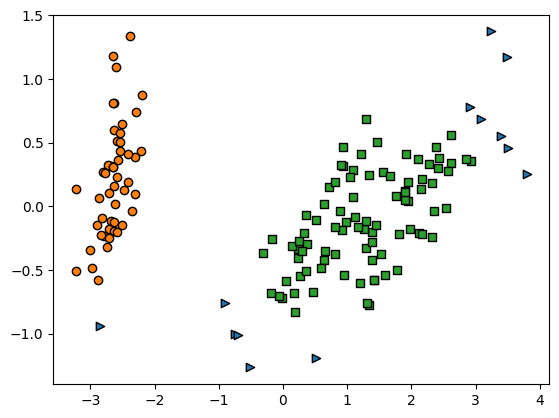

In [8]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_ocomponents=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_plot()함수는 ftr1, ftr2, 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter = False)


별표로 표현된 값은 모두 노이즈이다. PCA로 2차원으로 표현하면 이상치인 노이즈 데이터가 명확히 드러난다. DBSCAn을적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋다. 일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아진다.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


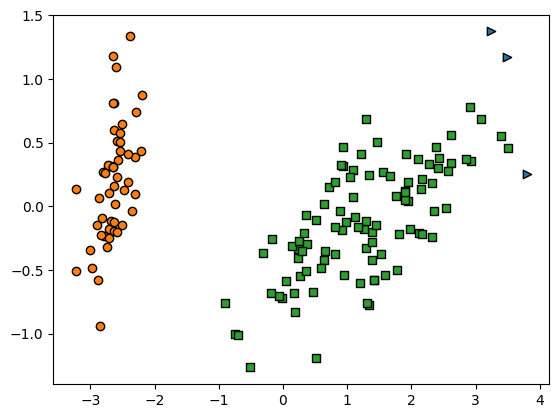

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [13]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

DBSCAN(eps=0.6, min_samples=16)

**DBSCAN 적용하기 – make_circles() 데이터 세트**

make_circles() 함수는 오직 2개의 피처만을 생성하므로 별도의 피처 개수를 지정할 필요가 없다. 파라미터 noise는 노이즈 데이터 세트의 비율이며, factor는 외부 원과 내부 원의 scale 비율이다.

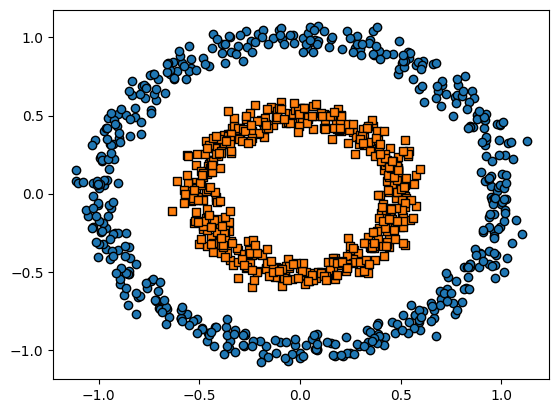

In [14]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

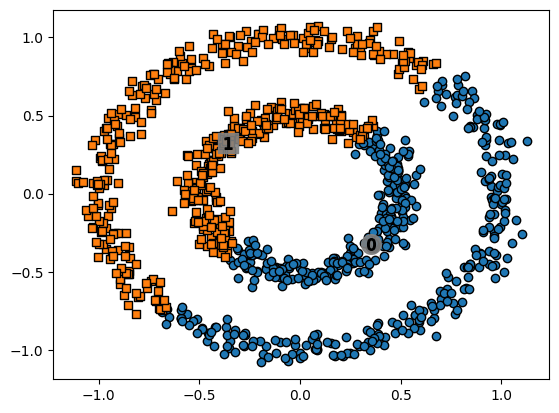

In [15]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화됐다. 거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어렵다.

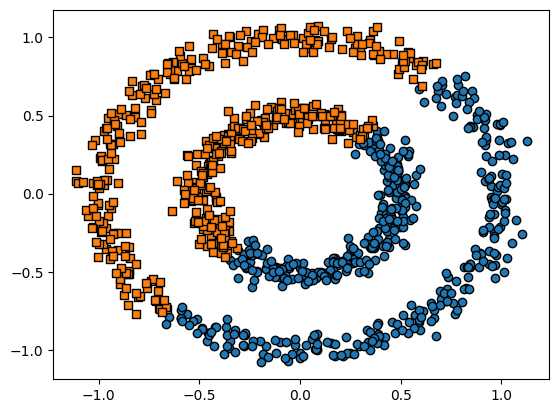

In [16]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

GMM도 앞 절의 일렬로 늘어선 데이터 세트에서는 효과적으로 군집화 적용이 가능했으나, 내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않았다.

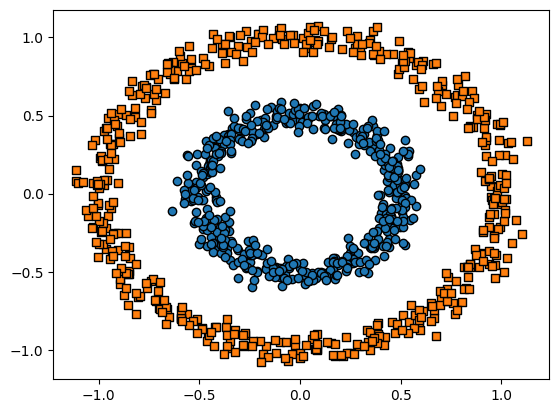

In [17]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

#**06 군집화 실습 - 고객 세그먼테이션**

**고객 세그먼테이션의 정의와 기법**

고객 세그먼테이션은 다양한 기준으로 고객을 분류하는 기법을 지칭한다.
고객을 분류하는 요소는 여러 가지가 있다. 중요한 분류 요소는 어떤 상품을 얼마나 많은 비용을 써서 얼마나 자주 사용하는가에 기반한 정보로 분류하는 것이다.

주요 목표는 타깃 마케팅이다. 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것이다.

RFM 기법은 Recency, Frequency, Monetary Value의 앞글자를 딴것으로 각각 가장최근 상품 구입일에서 오늘까지의 기간, 상품구매 횟수, 총 구매금액 을 의미한다.



**데이터 세트 로딩과 데이터 클랜징**

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel('/content/drive/MyDrive/MLData/Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [21]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [22]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [23]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [24]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


**RFM 기반 데이터 가공**

In [25]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [26]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [27]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

In [28]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [29]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


**RFM 기반 고객 세그먼테이션**

온라인 판매 데이터 세트는 소매업체의 대규모 주문을 포함하고 있다. 이들은 주문 횟수와 주문 금액에서 개인 고객 주문과 매우 큰 차이를 나타내고 있으며 이로 인해 매우 왜곡된 데이터 분포도를 가지게 되어 군집화가 한쪽 군집에만 집중되는 현상이 발생하게 된다. 먼저 온라인 판매 데이터 세트의 칼럼 별 히스토그램을 확인하고, 이처럼 왜곡된 데이터 분포도에서 군집화를 수행할때 어떤 현상이 발생하는지 알아보자.

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

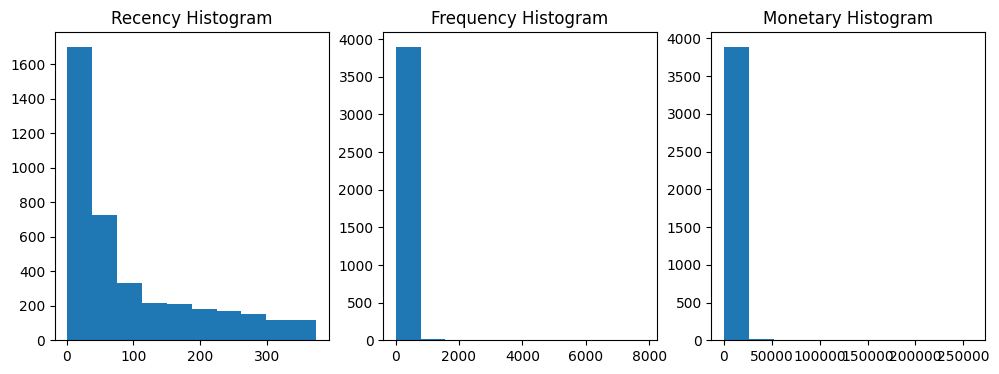

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

모두 왜곡된 분포도를 가지고 있으며 특정 범위에 값이 몰려있어 왜곡 정도가 매우 심하다.

In [31]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


왜곡 정도가 매우 높은 데이터 세트에 K-평균 군집을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행된다. 먼저 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정한 뒤에 K-평균을 수행한다.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.576


In [33]:
import matplotlib.pyplot as plt

import matplotlib.cm as cm

import numpy as np

import pandas as pd

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.decomposition import PCA


def visualize_silhouette(cluster_lists, X_features):

    # Visualize Silhouette for each cluster_lists

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)



    for ind, n_cluster in enumerate(cluster_lists):

        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')

        cluster_labels = kmeans.fit_predict(X_features)



        silhouette_avg = silhouette_score(X_features, cluster_labels)

        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)



        y_lower = 10

        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n' \

                           'Silhouette Score :' + str(round(silhouette_avg, 3)))

        axs[ind].set_xlabel("The silhouette coefficient values")

        axs[ind].set_ylabel("Cluster label")

        axs[ind].set_xlim([-0.1, 1])

        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])

        axs[ind].set_yticks([])

        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])



        for i in range(n_cluster):

            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()



            size_cluster_i = ith_cluster_silhouette_values.shape[0]

            y_upper = y_lower + size_cluster_i



            color = cm.nipy_spectral(float(i) / n_cluster)

            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, \

                                   facecolor=color, edgecolor=color, alpha=0.7)



            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10



        axs[ind].axvline(x=silhouette_avg, color="red", linestyle="--")



    plt.tight_layout()

    plt.show()


def visualize_kmeans_plot_multi(cluster_lists, X_features, iscenter=False):

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)



    pca = PCA(n_components=2, random_state=0)

    pca_transformed = pca.fit_transform(X_features)



    dataframe = pd.DataFrame(data=pca_transformed, columns=['ftr1', 'ftr2'])



    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']



    for ind, n_cluster in enumerate(cluster_lists):

        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')

        cluster_labels = kmeans.fit_predict(X_features)

        dataframe['cluster'] = cluster_labels



        unique_labels = np.unique(dataframe['cluster'])



        for label in unique_labels:

            label_cluster = dataframe[dataframe['cluster'] == label]

            axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',

                             marker=markers[label % len(markers)])



        if iscenter and hasattr(kmeans, 'cluster_centers_'):

            center_x_y = pca.transform(kmeans.cluster_centers_)

            for label, center in enumerate(center_x_y):

                axs[ind].scatter(x=center[0], y=center[1], s=200, color='gray', alpha=0.9,

                                 marker=markers[label % len(markers)])

                axs[ind].scatter(x=center[0], y=center[1], s=70, color='k', edgecolor='k',

                                 marker='$%d$' % label)


        axs[ind].set_title('Number of Cluster : ' + str(n_cluster))

        axs[ind].set_xlabel('ftr1')

        axs[ind].set_ylabel('ftr2')



    plt.tight_layout()

    plt.show()

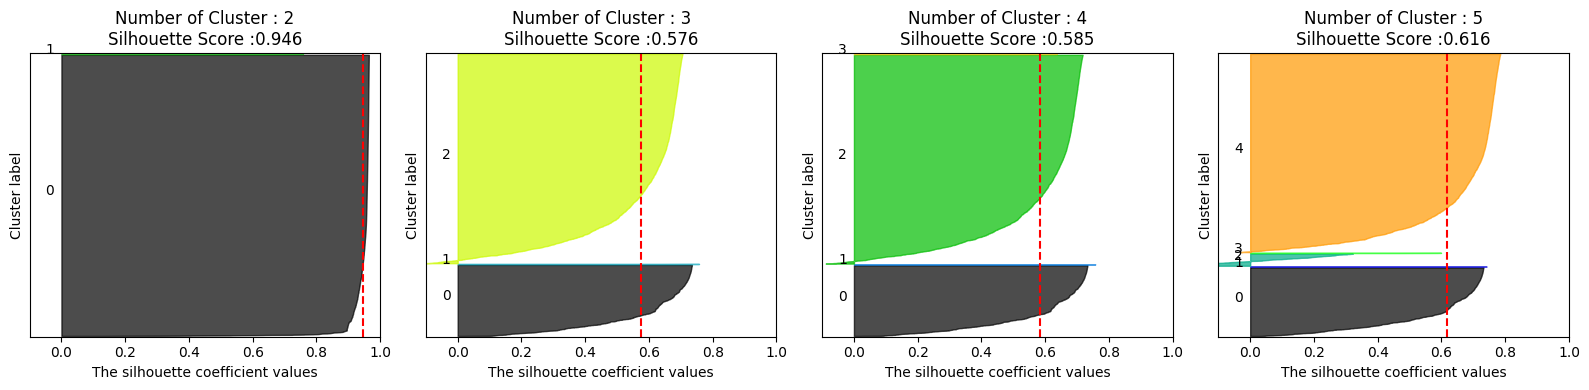

/tmp/ipython-input-3817680845.py:137: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
/tmp/ipython-input-3817680845.py:137: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',


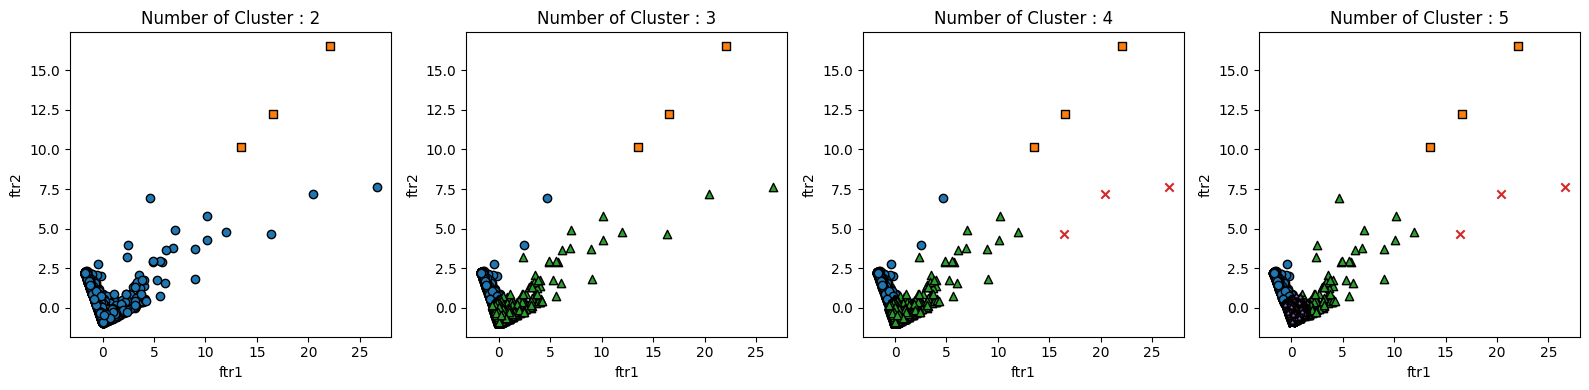

In [34]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

군집이 2개일 경우 0번 군집과 1번 군집이 너무 개괄적으로 군집화됐다. 군집 수를 증가시키면 개선이 가능할 것으로 예상됐는데, 실제 결과는 너무나 달랐다. 군집이 3개 이상일 때부터는 데이터 세트의 개수가 너무 작은 군집이 만들어진다.

이 데이터 세트의 경우 데이터 값이 거리 기반으로 광범위하게 퍼져 있어서 군집 수를 계속 늘려봐야 이 군집만 지속적으로 분리하게 되기에 의미 없는 군집화 결과로 이어지게 된다.

비지도학습 알고리즘의 하나인 군집화의 기능적 의미는 숨어 있는 새로운 집단을 발견하는 것이다. 새로운 군집 내의 데이터 값을 분석하고 이해함으로써 이 집단에 새로운 의미를 부여할 수 있다.

In [35]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))


실루엣 스코어는 : 0.303


실루엣 스코어는 변환하기 전보다 떨어진다. 하지만 실루엣 스코어의 절대치가 중요한 것이 아님을 앞의 예제에서 잘 알 수 있다. 어떻게 개별 군집이 더 균일하게 나뉠 수 있는지가 더 중요하다.

#**07 정리**

각 군집화 기법은 나름의 장/단점을 가지고 있으며, 군집화하려는 데이터의 특성에 맞게 선택해야 한다. K-평균의 경우 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행한다. 복잡한 구조를 가지는 데이터 세트에 적용하기에는 한계가 있으며, 군집의 개수를 최적화하기 어렵다. K-평균은 군집이 잘 되었는지의 평가를 위해 실루엣 계수를 사용한다.

평균 이동은 K-평균과 유사하지만 거리 중심이 아니라 데이터가 모여 있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행한다.

GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 모델을 섞어서 생성된 모델로 가정해 수행하는 방식이다.

DBSCAN은 밀도 기반 군집화의 대표적인 알고리즘이다. DBSCAN은 입실론 주변 영역 내에 포함되는 최소 데이터 개수 충족 여부에 따라 데이터 포인트를 핵심 포인트, 이웃 포인트, 경계 포인트, 잡음 포인트로 구분하고 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 수행하는 방식이다.